In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import *

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000,)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
#y_train = tf.keras.utils.to_categorical(y_train)
#y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True)

train_set = train_datagen.flow(x_train, y_train, batch_size = 64)

In [9]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.Input((32,32,3)))

cnn.add(Conv2D(filters = 32,
              kernel_size = (3,3),
              activation = "relu",
              padding = "same"))

cnn.add(BatchNormalization())

cnn.add(Conv2D(filters = 32,
              kernel_size = (3,3),
              activation = "relu",
              padding = "same"))

cnn.add(BatchNormalization())

cnn.add(MaxPooling2D((2,2)))

cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters = 64,
              kernel_size = (3,3),
              activation = "relu",
              padding = "same"))

cnn.add(BatchNormalization())

cnn.add(Conv2D(filters = 64,
              kernel_size = (3,3),
              activation = "relu",
              padding = "same"))

cnn.add(BatchNormalization())

cnn.add(MaxPooling2D((2,2)))

cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters = 128,
              kernel_size = (3,3),
              activation = "relu",
              padding = "same"))

cnn.add(BatchNormalization())

cnn.add(Conv2D(filters = 128,
              kernel_size = (2,2),
              activation = "relu",
              padding = "same"))

cnn.add(BatchNormalization())

cnn.add(MaxPooling2D((2,2)))

cnn.add(Dropout(0.2))

cnn.add(Flatten())

cnn.add(Dense(units = 128,
             activation = "relu"))

cnn.add(BatchNormalization())

cnn.add(Dropout(0.2))

cnn.add(Dense(units = 10,
             activation = "softmax"))


In [10]:
cnn.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

history = cnn.fit(x = train_set, epochs = 100, steps_per_epoch = int(x_train.shape[0]/64), validation_data = (x_test,y_test))

Epoch 1/100
781/781 [==============================] - 140s 176ms/step - loss: 1.5190 - accuracy: 0.4637 - val_loss: 1.1373 - val_accuracy: 0.5916
Epoch 2/100
781/781 [==============================] - 139s 178ms/step - loss: 1.0475 - accuracy: 0.6260 - val_loss: 0.8478 - val_accuracy: 0.6993
Epoch 3/100
781/781 [==============================] - 138s 177ms/step - loss: 0.8937 - accuracy: 0.6865 - val_loss: 0.9978 - val_accuracy: 0.6682
Epoch 4/100
781/781 [==============================] - 140s 179ms/step - loss: 0.8139 - accuracy: 0.7147 - val_loss: 0.6902 - val_accuracy: 0.7661
Epoch 5/100
781/781 [==============================] - 146s 187ms/step - loss: 0.7389 - accuracy: 0.7401 - val_loss: 0.8869 - val_accuracy: 0.6999
Epoch 6/100
781/781 [==============================] - 145s 186ms/step - loss: 0.6865 - accuracy: 0.7619 - val_loss: 0.7962 - val_accuracy: 0.7298
Epoch 7/100
781/781 [==============================] - 140s 180ms/step - loss: 0.6501 - accuracy: 0.7749 - val_loss: 0

781/781 [==============================] - 140s 179ms/step - loss: 0.2906 - accuracy: 0.8980 - val_loss: 0.3767 - val_accuracy: 0.8830
Epoch 57/100
781/781 [==============================] - 140s 179ms/step - loss: 0.2962 - accuracy: 0.8971 - val_loss: 0.3337 - val_accuracy: 0.8913
Epoch 58/100
781/781 [==============================] - 139s 179ms/step - loss: 0.2914 - accuracy: 0.8975 - val_loss: 0.3663 - val_accuracy: 0.8811
Epoch 59/100
781/781 [==============================] - 140s 179ms/step - loss: 0.2859 - accuracy: 0.9002 - val_loss: 0.4321 - val_accuracy: 0.8615
Epoch 60/100
781/781 [==============================] - 141s 181ms/step - loss: 0.2846 - accuracy: 0.8991 - val_loss: 0.4315 - val_accuracy: 0.8642
Epoch 61/100
781/781 [==============================] - 140s 179ms/step - loss: 0.2779 - accuracy: 0.9021 - val_loss: 0.3293 - val_accuracy: 0.8922
Epoch 62/100
781/781 [==============================] - 141s 180ms/step - loss: 0.2809 - accuracy: 0.9020 - val_loss: 0.3765 

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

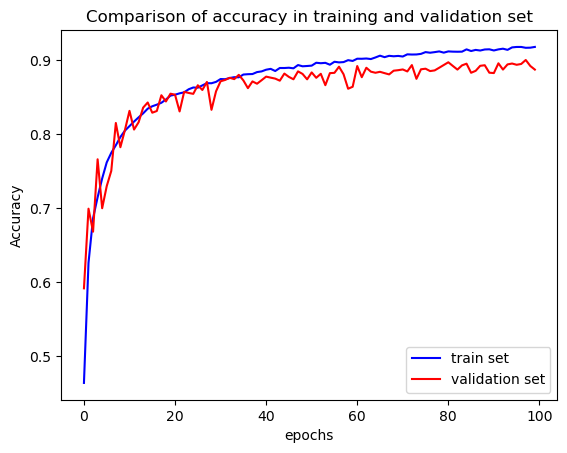

In [12]:
ta = history.history["accuracy"]
va = history.history["val_accuracy"]

plt.plot(ta, "blue" , label = "train set")
plt.plot(va, "red", label = "validation set")
plt.title("Comparison of accuracy in training and validation set")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()

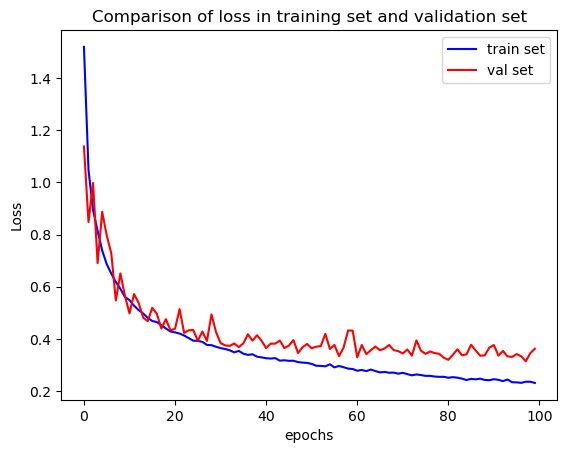

In [15]:
tl = history.history["loss"]
vl = history.history["val_loss"]

plt.plot(tl, "blue" , label = "train set")
plt.plot(vl, "red", label = "val set")
plt.title("Comparison of loss in training set and validation set")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model.evaluate(x_test, y_test)